In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import os
src_dir = '/content/gdrive/My Drive/dataset/klasifikasi_buah_lokal'
rambutan_dir = os.path.join(src_dir,'rambutan')
durian_dir = os.path.join(src_dir,'durian')

In [7]:
print('rambutan : ',len(os.listdir(rambutan_dir)))
print('durian : ',len(os.listdir(durian_dir)))

rambutan :  82
durian :  86


In [26]:
generator = ImageDataGenerator(validation_split=0.4, 
                               rescale=1/255, 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               rotation_range=20, 
                               fill_mode='nearest')
train_data = generator.flow_from_directory(src_dir, 
                                           batch_size=32, 
                                           target_size=(150,150), 
                                           subset='training')
val_data = generator.flow_from_directory(src_dir, 
                                         batch_size=32,  
                                         target_size=(150,150), 
                                         subset='validation')

Found 98 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
model.fit(
    train_generator,
    steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20,  # tambahkan epochs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/20
25/25 - 10s - loss: 0.6881 - accuracy: 0.6837 - 10s/epoch - 386ms/step
Epoch 2/20
25/25 - 9s - loss: 0.3265 - accuracy: 0.8980 - 9s/epoch - 341ms/step
Epoch 3/20
25/25 - 8s - loss: 0.2212 - accuracy: 0.9388 - 8s/epoch - 337ms/step
Epoch 4/20
25/25 - 9s - loss: 0.2122 - accuracy: 0.9400 - 9s/epoch - 344ms/step
Epoch 5/20
25/25 - 8s - loss: 0.2858 - accuracy: 0.9286 - 8s/epoch - 303ms/step
Epoch 6/20
25/25 - 8s - loss: 0.4022 - accuracy: 0.9200 - 8s/epoch - 337ms/step
Epoch 7/20
25/25 - 8s - loss: 0.2302 - accuracy: 0.9490 - 8s/epoch - 324ms/step
Epoch 8/20
25/25 - 8s - loss: 0.1232 - accuracy: 0.9694 - 8s/epoch - 331ms/step
Epoch 9/20
25/25 - 8s - loss: 0.1166 - accuracy: 0.9700 - 8s/epoch - 314ms/step
Epoch 10/20
25/25 - 8s - loss: 0.0438 - accuracy: 0.9900 - 8s/epoch - 335ms/step
Epoch 11/20
25/25 - 8s - loss: 0.4588 - accuracy: 0.9082 - 8s/epoch - 330ms/step
Epoch 12/20
25/25 - 8s - loss: 0.2452 - accuracy: 0.9184 - 8s/epoch - 324ms/step
Epoch 13/20
25/25 - 8s - loss: 0.21

Saving Waspada Si Raja Buah Hasil Karbitan_ Simak 6_yythkg.jpg to Waspada Si Raja Buah Hasil Karbitan_ Simak 6_yythkg (4).jpg
1/1 [==============================] - 0s 33ms/step
Waspada Si Raja Buah Hasil Karbitan_ Simak 6_yythkg.jpg
Durian


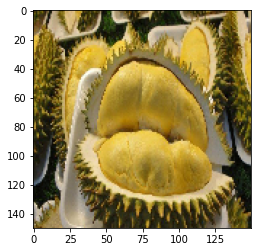

In [38]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150,150))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print(fn)
    if classes == 0:
     print('Durian')
    elif classes == 1 :
     print('Rambutan')